In [1]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

genres_dir = genres_dir = "C:/Users/lelin/Desktop/ADM/MACHINE LEARNING/MusicGenreClassifier/GTZAN/Data/genres_original"
genres = os.listdir(genres_dir)

# Function to extract features from audio files
def extract_features(file_path, mfcc, chroma, mel):
    audio_data, sr = librosa.load(file_path)
    features = []
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13).T, axis=0)
        features.extend(mfccs)
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr).T, axis=0)
        features.extend(chroma)
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=audio_data, sr=sr).T, axis=0)
        features.extend(mel)
    return features

# Function to load GTZAN dataset and extract features
def load_data(test_size=0.2, val_size=0.2, mfcc=True, chroma=True, mel=True):
    data = []
    labels = []
    genres = os.listdir(genres_dir) 
    for genre in genres:
        genre_path = os.path.join(genres_dir, genre)  # Construct full path to genre subdirectory
        for filename in os.listdir(genre_path):  # List files in the genre subdirectory
            file_path = os.path.join(genre_path, filename)  # Construct full path to audio file
            features = extract_features(file_path, mfcc, chroma, mel)
            data.append(features)
            labels.append(genre)
    
    # Convert labels to integers
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    
    # Split the dataset into training, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42, stratify=labels)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42, stratify=y_train)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, label_encoder.classes_

# Load data and extract features
X_train, X_val, X_test, y_train, y_val, y_test, classes = load_data()

# Print the shape of the data
print("Training set:", len(X_train))
print("Validation set:", len(X_val))
print("Test set:", len(X_test))
print("Number of classes:", len(classes))

Training set: 639
Validation set: 160
Test set: 200
Number of classes: 10


Genre: blues


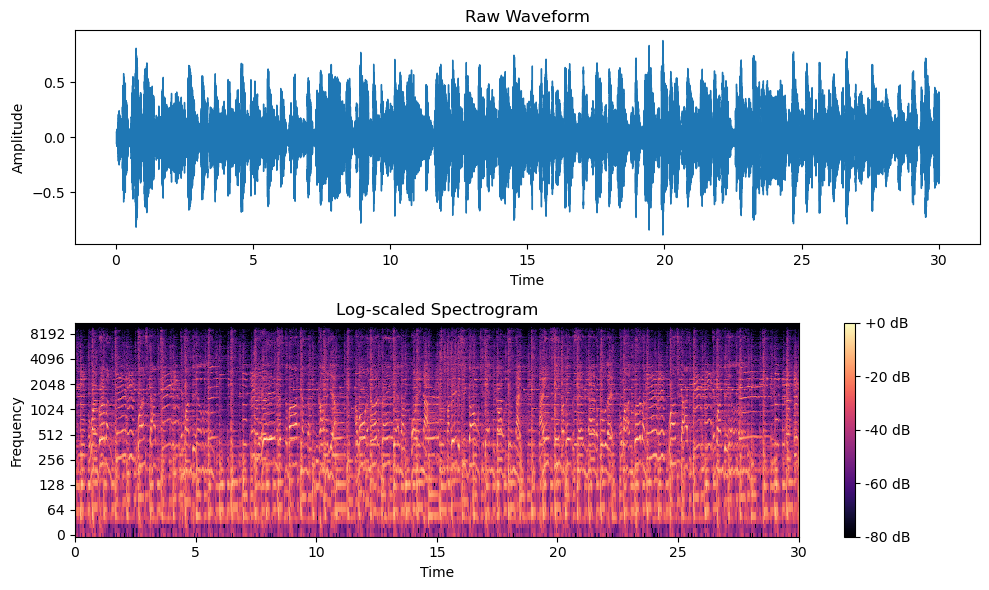

Genre: classical


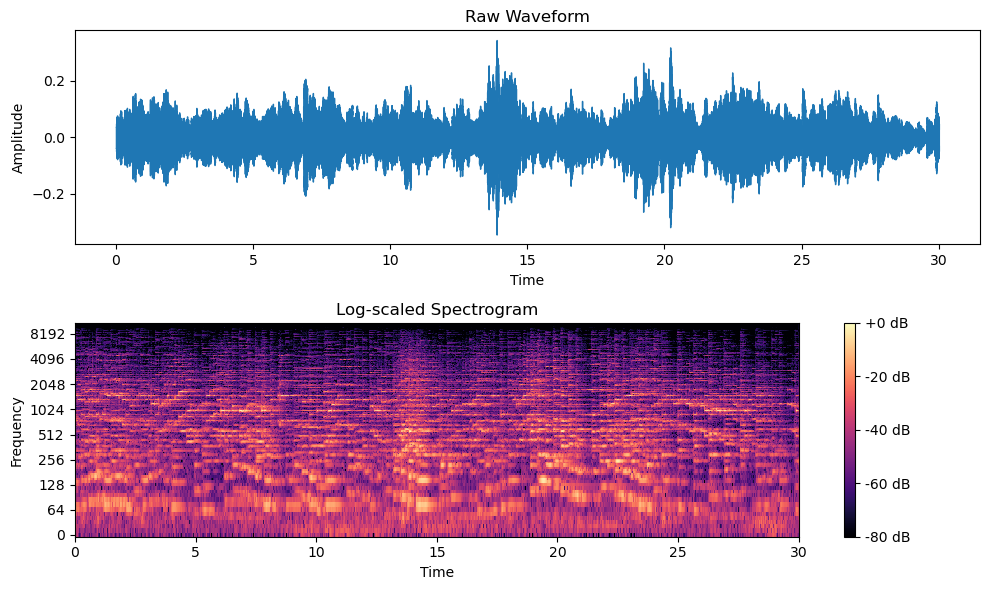

Genre: country


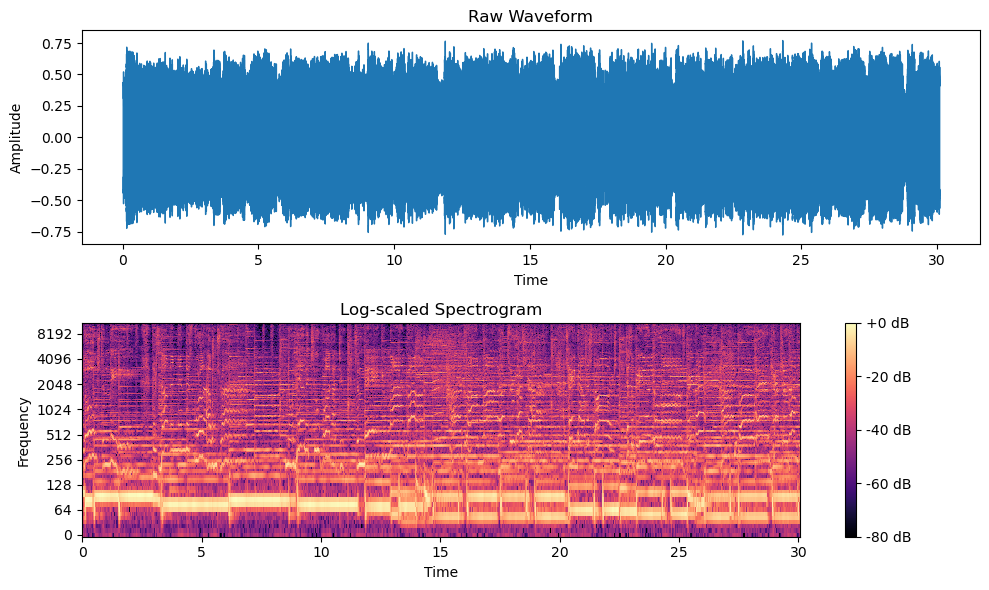

Genre: disco


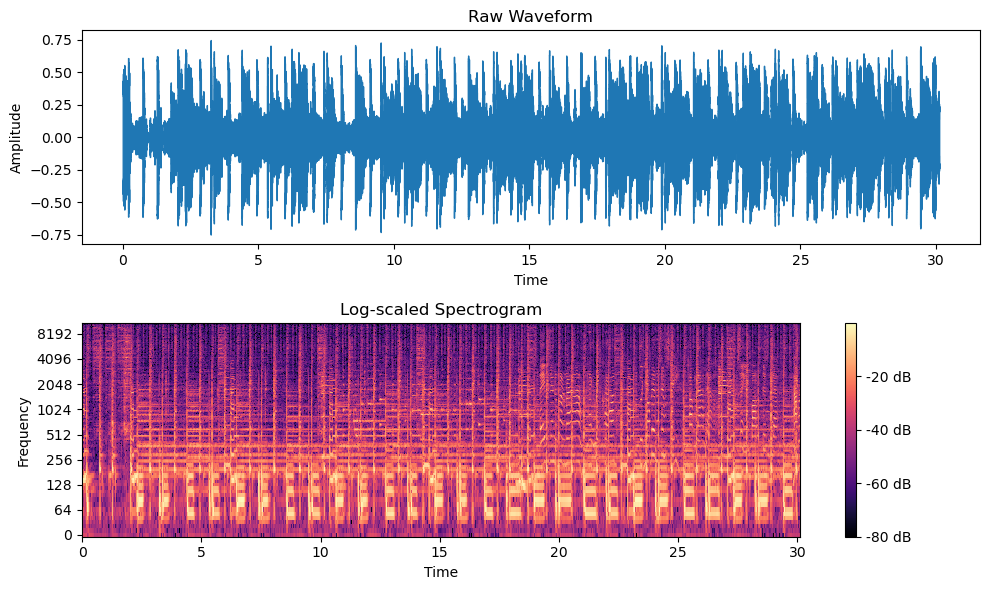

Genre: hiphop


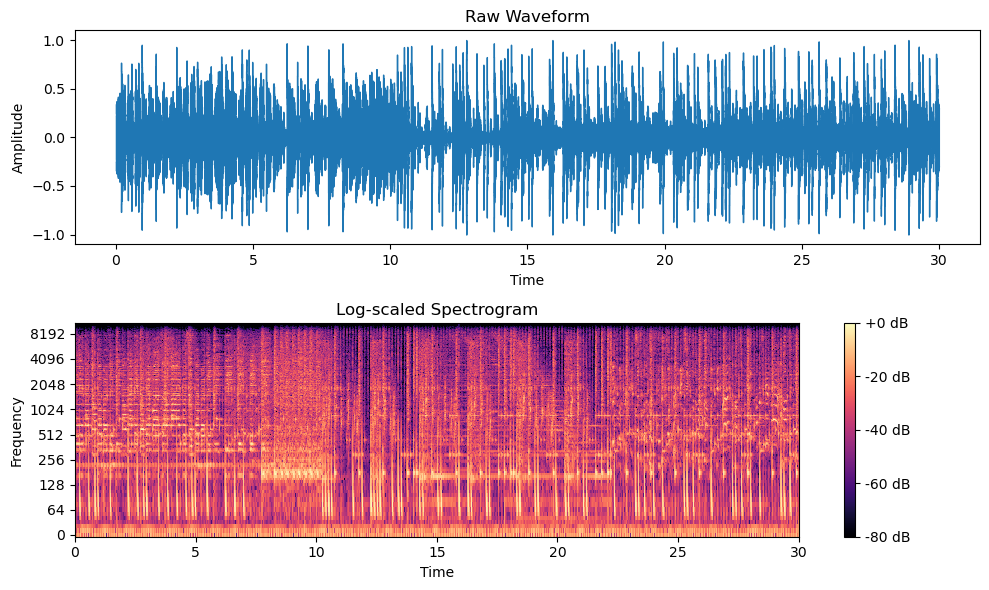

Genre: jazz


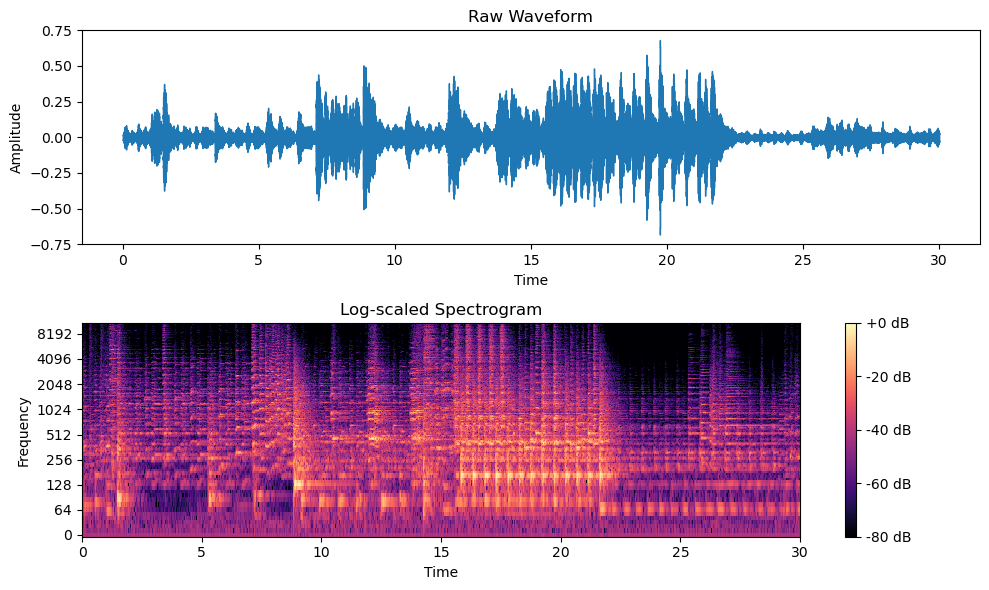

Genre: metal


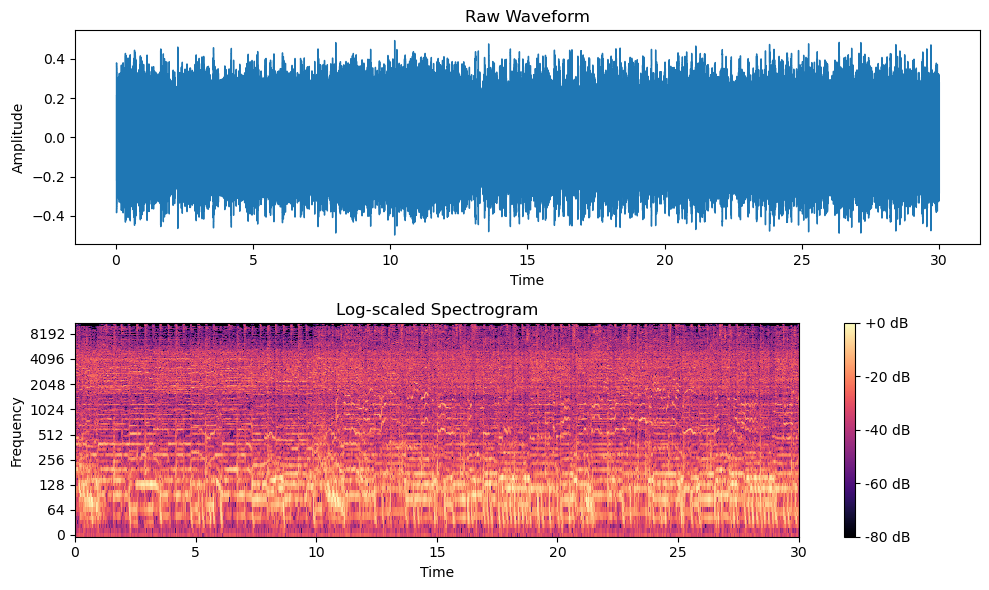

Genre: pop


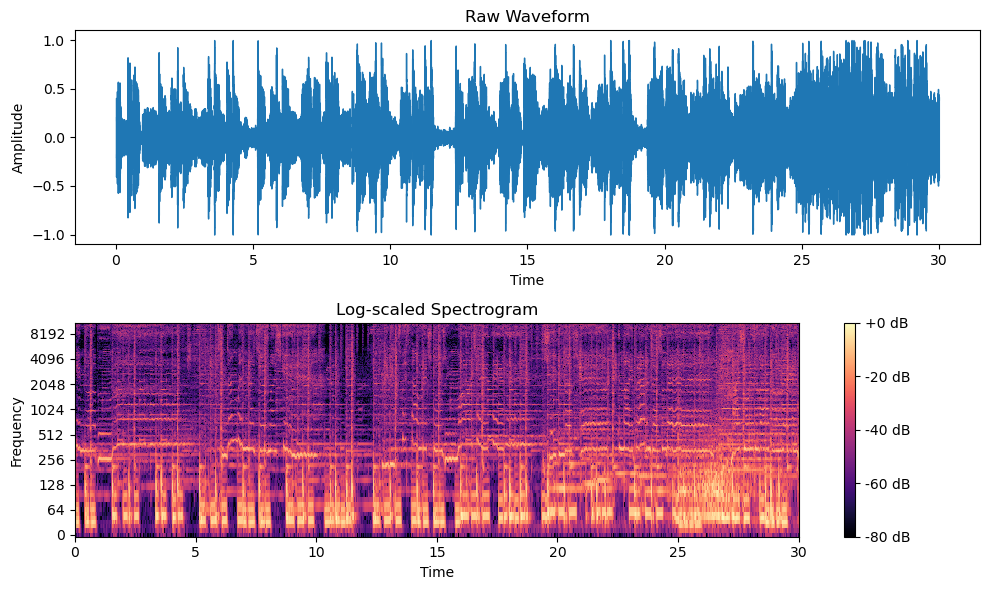

Genre: reggae


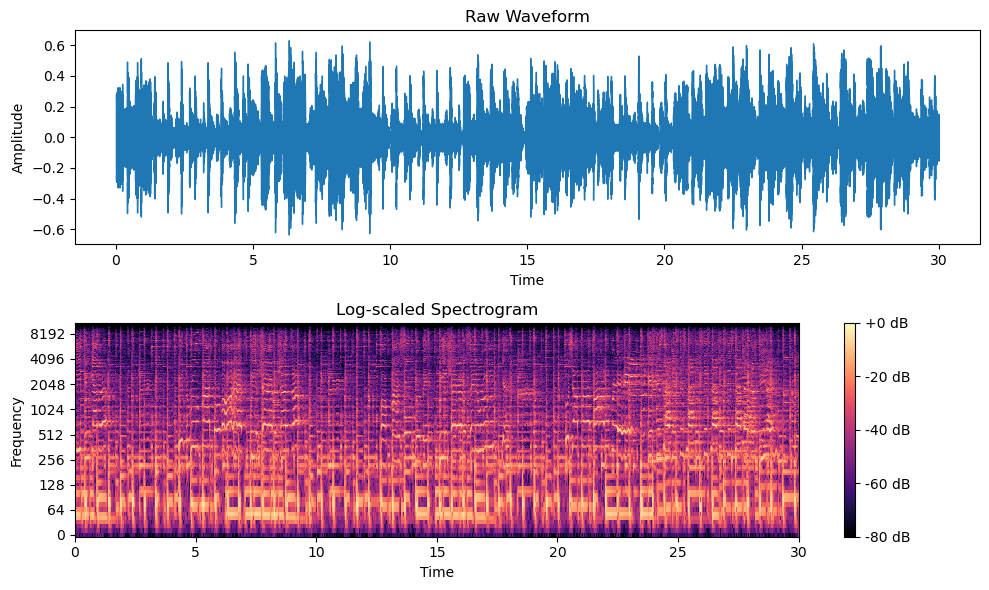

Genre: rock


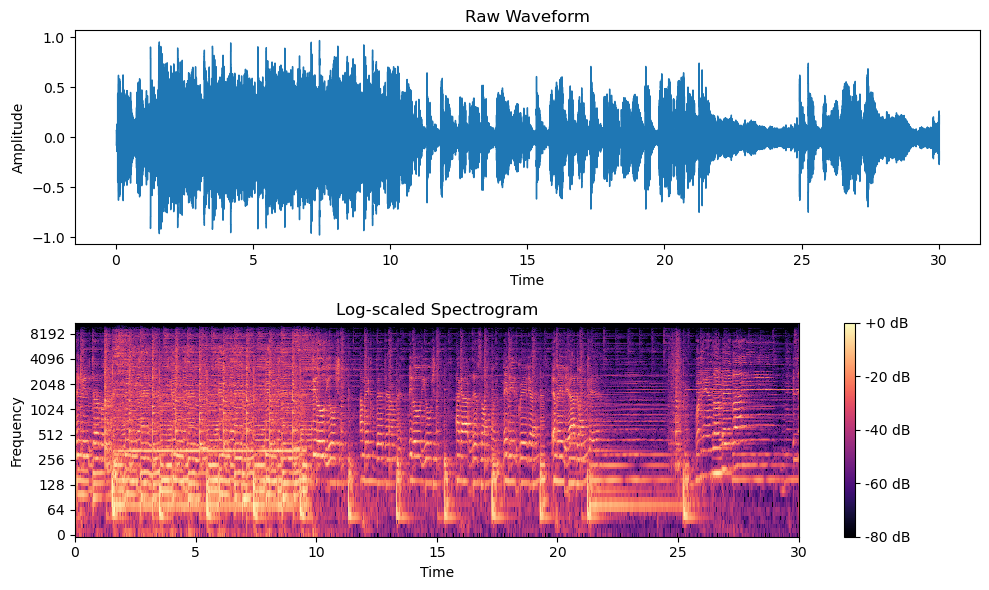

In [5]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to plot raw waveform and STFT spectrogram
def plot_waveform_spectrogram(file_path):
    # Load audio file
    audio_data, sr = librosa.load(file_path)
    
    # Plot raw waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title('Raw Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    
    # Plot STFT spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-scaled Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Path to the dataset directory
genres_dir = "C:/Users/lelin/Desktop/ADM/MACHINE LEARNING/MusicGenreClassifier/GTZAN/Data/genres_original"
genres = os.listdir(genres_dir)

# Iterate over each genre and plot waveform and spectrogram
for genre in genres:
    genre_path = os.path.join(genres_dir, genre) 
    file_path = os.path.join(genre_path, os.listdir(genre_path)[0])
    print(f'Genre: {genre}')
    plot_waveform_spectrogram(file_path)

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model architecture
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(256, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Input shape is the shape of the input feature vector
input_shape = (X_train.shape[1], 1)  # Shape of the input features
num_classes = len(classes)  # Number of output classes

# Build the model
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\lelin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_66 (Conv1D)                   │ (None, 151, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_66 (MaxPooling1D)      │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_67 (Conv1D)                   │ (None, 73, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_67 (MaxPooling1D)      │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_68 (Conv1D)                   │ (None, 34, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_68 (MaxPooling1D)      │ (None, 17, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 4352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 512)                 │       2,228,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,357,386 (8.99 MB)

 Trainable params: 2,357,386 (8.99 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Input shape is the shape of the input feature vector
input_shape = (X_train.shape[1], 1)  # Shape of the input features
num_classes = len(classes)  # Number of output classes

# Build the model
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_69 (Conv1D)                   │ (None, 151, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_69 (MaxPooling1D)      │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_70 (Conv1D)                   │ (None, 73, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_70 (MaxPooling1D)      │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_71 (Conv1D)                   │ (None, 34, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_71 (MaxPooling1D)      │ (None, 17, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 4352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 512)                 │       2,228,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,357,386 (8.99 MB)

 Trainable params: 2,357,386 (8.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.1949 - loss: 4.9276 - val_accuracy: 0.3938 - val_loss: 1.7623
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3351 - loss: 1.8230 - val_accuracy: 0.5188 - val_loss: 1.5540
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4021 - loss: 1.6174 - val_accuracy: 0.5250 - val_loss: 1.4286
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4776 - loss: 1.4985 - val_accuracy: 0.5562 - val_loss: 1.3526
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5401 - loss: 1.3607 - val_accuracy: 0.5437 - val_loss: 1.3213
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5665 - loss: 1.2146 - val_accuracy: 0.5938 - val_loss: 1.2103
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6342 - loss: 1.0853 - val_accuracy: 0.6625 - val_loss: 1.1542
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7246 - loss: 0.9481 - val_accuracy: 0.6375 - v

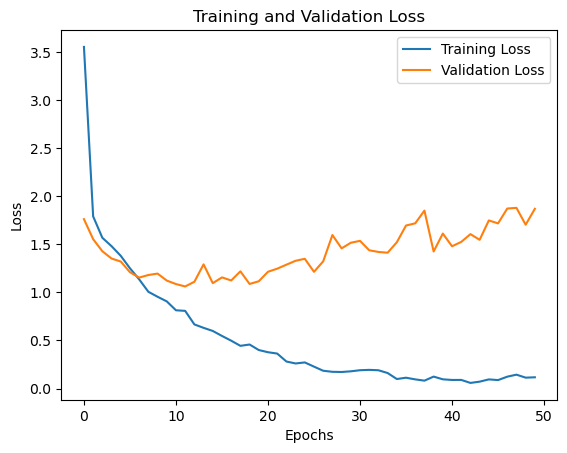

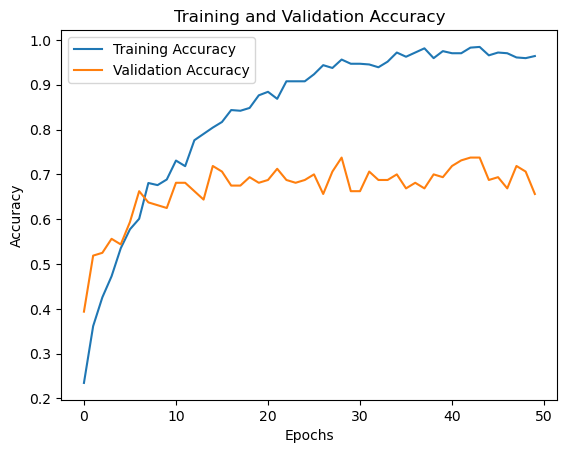

In [107]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Define the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Get the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert labels back to original classes
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Convert labels to tensors
y_test_labels_tensor = tf.convert_to_tensor(y_test_labels)
y_pred_labels_tensor = tf.convert_to_tensor(y_pred_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_labels_tensor, y_pred_labels_tensor, average='weighted')
recall = recall_score(y_test_labels_tensor, y_pred_labels_tensor, average='weighted')
f1 = f1_score(y_test_labels_tensor, y_pred_labels_tensor, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Precision: 0.6796413411150253
Recall: 0.64
F1-score: 0.6366862179073773


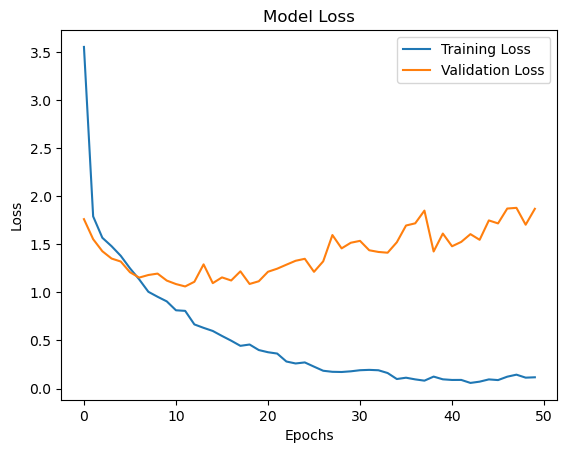

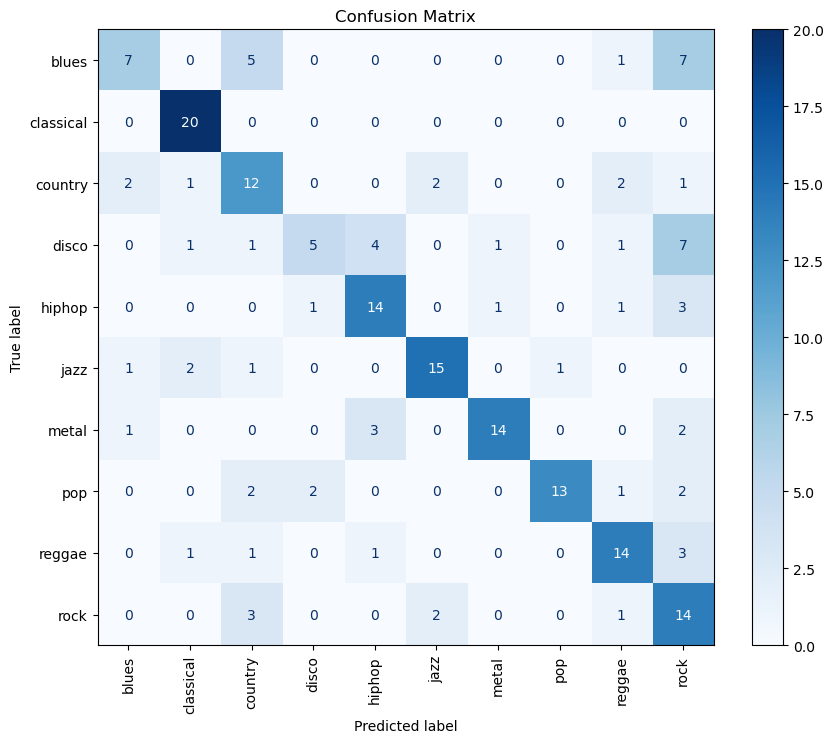

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix with rotated x-axis labels
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figsize as needed
    disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')  # Rotate x-axis labels
    plt.title('Confusion Matrix')
    plt.show()

# Plot loss curves
plot_loss(history)

# Plot confusion matrix
plot_confusion_matrix(y_test_labels, y_pred_labels, classes)

In [118]:
import pandas as pd

# Generate confusion matrix with rotated x-axis labels
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    return cm_df

# Plot confusion matrix
confusion_matrix_df = plot_confusion_matrix(y_test_labels, y_pred_labels, classes)
print("Confusion Matrix:")
print(confusion_matrix_df)

Confusion Matrix:
           blues  classical  country  disco  hiphop  jazz  metal  pop  reggae  \
blues          8          0        7      0       1     0      0    0       1   
classical      0         18        0      0       0     2      0    0       0   
country        2          1       14      0       0     1      0    0       2   
disco          0          1        2      9       4     0      1    0       1   
hiphop         0          0        0      1      16     0      1    0       1   
jazz           1          1        1      0       0    17      0    0       0   
metal          0          0        0      0       2     0     18    0       0   
pop            0          0        2      1       0     2      0   15       0   
reggae         0          1        1      0       0     0      0    1      15   
rock           0          0        4      0       0     4      1    1       1   

           rock  
blues         3  
classical     0  
country       0  
disco         2  


In [124]:
import pandas as pd

# Sample confusion matrix DataFrame
confusion_matrix_df = pd.DataFrame({
    'blues': [8, 0, 7, 0, 1, 0, 0, 0, 1, 3],
    'classical': [0, 18, 0, 0, 0, 2, 0, 0, 0, 0],
    'country': [2, 1, 14, 0, 0, 1, 0, 0, 2, 0],
    'disco': [0, 1, 2, 9, 4, 0, 1, 0, 1, 2],
    'hiphop': [0, 0, 0, 1, 16, 0, 1, 0, 1, 1],
    'jazz': [1, 1, 1, 0, 0, 17, 0, 0, 0, 0],
    'metal': [0, 0, 0, 0, 2, 0, 18, 0, 0, 0],
    'pop': [0, 0, 2, 1, 0, 2, 0, 15, 0, 0],
    'reggae': [0, 1, 1, 0, 0, 0, 0, 1, 15, 2],
    'rock': [0, 0, 4, 0, 0, 4, 1, 1, 1, 9]
}, index=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

def get_confused_genres(genre, confusion_matrix_df):
    confused_genres = confusion_matrix_df.loc[genre].sort_values(ascending=False)
    confused_genres = confused_genres[confused_genres.index != genre]  # Exclude the input genre
    return confused_genres

# Example usage
input_genre = 'disco'
confused_genres = get_confused_genres(input_genre, confusion_matrix_df)
print(f"Genres confused with '{input_genre}':")
print(confused_genres)

Genres confused with 'disco':
hiphop       1
pop          1
blues        0
classical    0
country      0
jazz         0
metal        0
reggae       0
rock         0
Name: disco, dtype: int64


In [121]:
def most_least_confused_genre(confusion_matrix_df):
    total_confused_instances = confusion_matrix_df.sum(axis=1) - confusion_matrix_df.values.diagonal()
    most_confused_genre = total_confused_instances.idxmax()
    least_confused_genre = total_confused_instances.idxmin()
    return most_confused_genre, least_confused_genre

# Example usage
most_confused, least_confused = most_least_confused_genre(confusion_matrix_df)
print("Most confused genre:", most_confused)
print("Least confused genre:", least_confused)


Most confused genre: country
Least confused genre: disco


In [115]:
# Train the model without data augmentation
epochs = 50
batch_size = 128

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9606 - loss: 0.0984 - val_accuracy: 0.6687 - val_loss: 1.5702
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9759 - loss: 0.0735 - val_accuracy: 0.6875 - val_loss: 1.3113
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9819 - loss: 0.0772 - val_accuracy: 0.6812 - val_loss: 1.3499
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9875 - loss: 0.0454 - val_accuracy: 0.6812 - val_loss: 1.4932
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9913 - loss: 0.0326 - val_accuracy: 0.6938 - val_loss: 1.6208
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9959 - loss: 0.0332 - val_accuracy: 0.7188 - val_loss: 1.6453
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9995 - loss: 0.0176 - val_accuracy: 0.7312 - val_loss: 1.6060
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.7188 - val_loss: 1.55

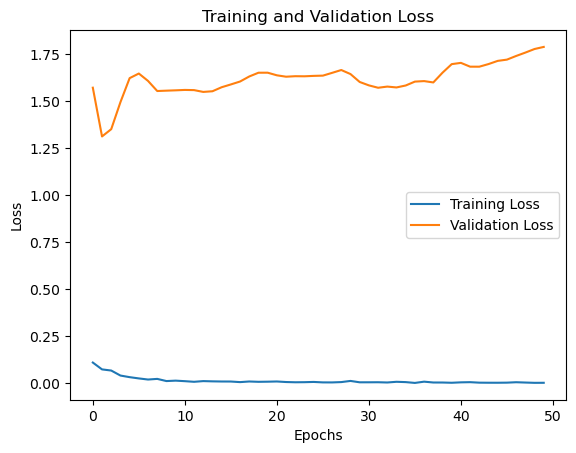

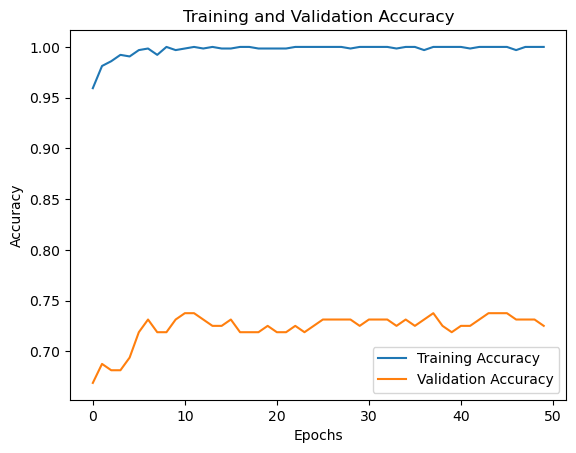

Test Accuracy: 0.6949999928474426


In [116]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)

In [117]:
# Define the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Get the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert labels back to original classes
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Convert labels to tensors
y_test_labels_tensor = tf.convert_to_tensor(y_test_labels)
y_pred_labels_tensor = tf.convert_to_tensor(y_pred_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_labels_tensor, y_pred_labels_tensor, average='weighted')
recall = recall_score(y_test_labels_tensor, y_pred_labels_tensor, average='weighted')
f1 = f1_score(y_test_labels_tensor, y_pred_labels_tensor, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Precision: 0.7147940871932292
Recall: 0.695
F1-score: 0.6893306534686892
